In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
import pickle

from scipy.special import ellipk, ellipe

from scipy.interpolate import griddata
from scipy.integrate import simps
from matplotlib.patches import Circle

In [2]:
def load_a_pickle(fn):
    with open(fn, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        data = pickle.load(f)
    return data

def Veffective(rho,sigma,n_epsilon,R):
    pf = np.pi*n_epsilon*(sigma**3)/3.0
    t9 = v9(rho/R)*((sigma/R)**9)
    t3 = v3(rho/R)*((sigma/R)**3)
    return pf*(t9-t3)

def Veffective_AB(rho,A,B,R):
    t9 = A*v9(rho/R)*((1.0/R)**9)
    t3 = B*v3(rho/R)*((1.0/R)**3)
    return t9-t3

def Vshell(rho,sigma,n,R1,R2):
    pf = np.pi*n*(sigma**3)/3.0
    t9 = v9(rho/R1)*((sigma/R1)**9)
    t3 = v3(rho/R1)*((sigma/R1)**3)
    y9 = v9(rho/R2)*((sigma/R2)**9)
    y3 = v3(rho/R2)*((sigma/R2)**3)
    return pf*(y3-y9+t9-t3)

def v9(x):
    pf = 1.0/(240.0*((1.0-(x**2))**9))
    t1 = (1091.0 + (11156.0*(x**2)) + (16434.0*(x**4)) + (4052.0*(x**6)) + (35*(x**8)))*ellipe(x**2)
    t2 = 8.0 * (1.0-(x**2)) * (1.0 + (7.0*(x**2))) * (97.0 + (134.0*(x**2)) + (25.0*(x**4))) * ellipk(x**2)
    return pf*(t1-t2)

def v3(x):
    pf = 2.0/((1.0-(x**2))**3)
    t1 = (7.0 + (x**2)) * ellipe(x**2)
    t2 = 4.0 * (1.0-(x**2)) * ellipk(x**2)
    return pf*(t1-t2)

def U(r,sigma,epsilon):
    """standard 12-6 Lennard-Jones"""
    pf = 4.0 * epsilon
    t12 = (sigma/r)**12
    t6 = (sigma/r)**6
    return pf * (t12 - t6)

def U_mb(r,sigma,epsilon):
    V = 0.0
    for i in range(len(r)):
        V += U(r[i],sigma[i],epsilon[i])
    return V

#First we define a few helper functions to go between Cartesian and Polar coordinates
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def U_min(r,sigma,n,R):
    return Veffective(r,sigma,n,R)

def get_average_fit_parameter2(fit_parameter,name="fit_parameter",plot_results=True,silent=False):
    mean_fit_parameter = np.mean(fit_parameter[fit_parameter >= 0])
    std_fit_parameter = np.std(fit_parameter[fit_parameter >= 0],ddof=1)
    not_min_outlier_ind = fit_parameter >= (mean_fit_parameter - (2*std_fit_parameter))
    not_max_outlier_ind = fit_parameter <= (mean_fit_parameter + (2*std_fit_parameter))
    not_outlier_ind = not_min_outlier_ind*not_max_outlier_ind
    new_mean_fit_parameter = np.mean(fit_parameter[not_outlier_ind])
    if not silent:
        print("{} values in original {} dataset".format(len(fit_parameter),name))
    while True:  
        if not silent:
            print("{} values in truncated {} dataset".format(len(fit_parameter[not_outlier_ind]),name))
        mean_fit_parameter = new_mean_fit_parameter
        std_fit_parameter = np.std(fit_parameter[not_outlier_ind],ddof=1)
        not_min_outlier_ind = fit_parameter >= (mean_fit_parameter - (2*std_fit_parameter))
        not_max_outlier_ind = fit_parameter <= (mean_fit_parameter + (2*std_fit_parameter))
        not_outlier_ind = not_min_outlier_ind*not_max_outlier_ind
        new_mean_fit_parameter = np.mean(fit_parameter[not_outlier_ind])
        if new_mean_fit_parameter == mean_fit_parameter:
            break
    std_fit_parameter = np.std(fit_parameter[not_outlier_ind],ddof=1)/np.sqrt(len(fit_parameter[not_outlier_ind]))
    if plot_results:
        fig,ax = plt.subplots()
        ax.plot(fit_parameter[not_outlier_ind])
        ax.axhline(new_mean_fit_parameter)
        ax.set_title(name)
    return new_mean_fit_parameter, std_fit_parameter, not_outlier_ind

In [3]:
method_1 = load_a_pickle("data/method_1.pickle")
method_2 = load_a_pickle("data/method_2.pickle")
method_3 = load_a_pickle("data/method_3.pickle")
method_ten_4 = load_a_pickle("data/method_ten_4.pickle")
method_five_4 = load_a_pickle("data/method_five_4.pickle")
method_one_4 = load_a_pickle("data/method_one_4.pickle")
method_thirty_4 = load_a_pickle("data/method_thirty_4.pickle")
method_sixty_4 = load_a_pickle("data/method_sixty_4.pickle")
method_int_ten_5 = load_a_pickle("data/method_int_ten_5.pickle")
method_int_five_5 = load_a_pickle("data/method_int_five_5.pickle")
method_int_one_5 = load_a_pickle("data/method_int_one_5.pickle")
method_int_thirty_5 = load_a_pickle("data/method_int_thirty_5.pickle")
method_int_sixty_5 = load_a_pickle("data/method_int_sixty_5.pickle")

In [5]:
# FIXME Hacky way to get variables into namespace so I can reuse code
locals().update(method_1)
locals().update(method_2)
locals().update(method_3)
locals().update(method_ten_4)
locals().update(method_five_4)
locals().update(method_one_4)
locals().update(method_thirty_4)
locals().update(method_sixty_4)
locals().update(method_int_ten_5)
locals().update(method_int_five_5)
locals().update(method_int_one_5)
locals().update(method_int_thirty_5)
locals().update(method_int_sixty_5)

# 1 Integrated over full radial space

(-65, 0)

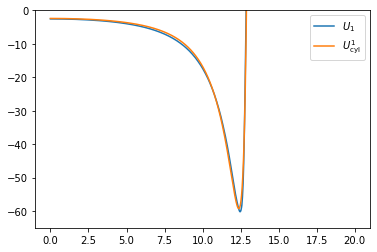

In [7]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_1,nε_1,R_1),label=r"$U_\mathrm{cyl}^1$")
ax.legend()
ax.set_ylim(-65,0)

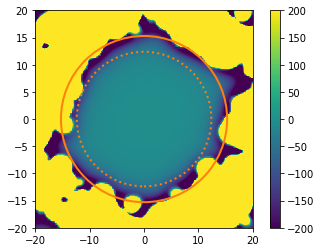

In [8]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_1,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_1,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Dashed line is minimum. Solid line is $R$.

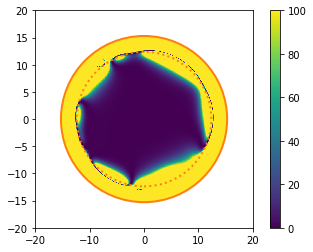

In [9]:
V_1 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_1,nε_1,R_1).T
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_1 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_1,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_1,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)


# 2 Views down an angle

Here we explore the effects of looking down an angle while standing at the center of the pore. We determine the parameters to $U_\mathrm{cyl}$ for each view and then average throwing out outliers.

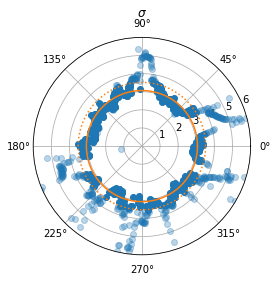

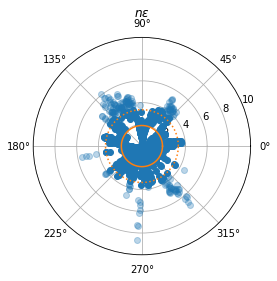

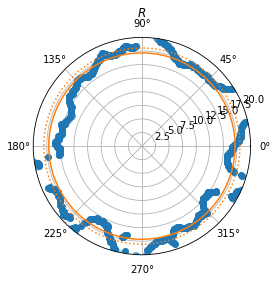

In [10]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_2[σ_not_outlier_2],σ_2[σ_not_outlier_2],linestyle="None",marker="o",color="C0")
ax.plot(phis_2[σ_outlier_2],σ_2[σ_outlier_2],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_2,np.ones_like(phis_2)*σ_mean_2,color="C1")
ax.plot(phis_2,np.ones_like(phis_2)*σ_mean_full_2,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_2[nε_not_outlier_2],nε_2[nε_not_outlier_2],linestyle="None",marker="o",color="C0")
ax.plot(phis_2[nε_outlier_2],nε_2[nε_outlier_2],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_2,np.ones_like(phis_2)*nε_mean_2,color="C1")
ax.plot(phis_2,np.ones_like(phis_2)*nε_mean_full_2,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_2[R_not_outlier_2],R_2[R_not_outlier_2],linestyle="None",marker="o",color="C0")
ax.plot(phis_2[R_outlier_2],R_2[R_outlier_2],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_2,np.ones_like(phis_2)*R_mean_2,color="C1")
ax.plot(phis_2,np.ones_like(phis_2)*R_mean_full_2,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

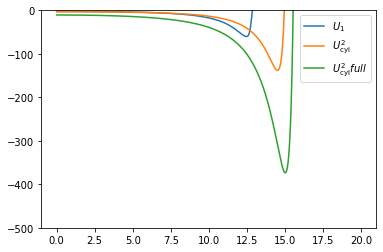

In [11]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_2,nε_mean_2,R_mean_2),label=r"$U_\mathrm{cyl}^2$")
ax.plot(r_1,U_min(r_1,σ_mean_full_2,nε_mean_full_2,R_mean_full_2),label=r"$U_\mathrm{cyl}^2 full$")
ax.legend()
ax.set_ylim(-500,0)

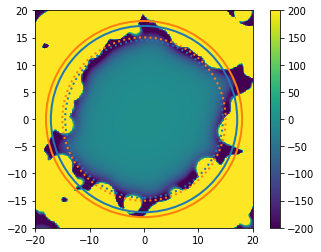

In [12]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_2,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_2,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_2,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_2,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

Dashed line is minimum. Solid line is $R$.

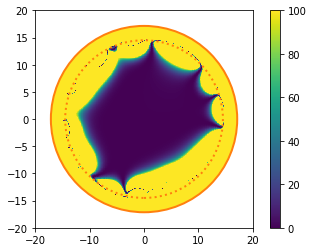

In [13]:
V_mean_2 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_2,nε_mean_2,R_mean_2).T
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_2 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_2,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_2,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)


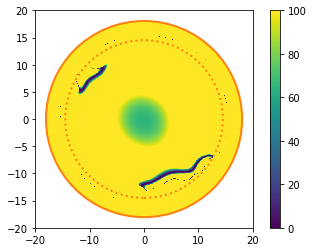

In [14]:
V_mean_full_2 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_2,nε_mean_full_2,R_mean_full_2).T
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_2 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_2,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_2,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)


Major discrepancies using the full instead of throwing out outilers.

# 3 Fit to full set

Here we find parameters to $U_\mathrm{cyl}$ over the full interpolated grid. Here we will use the same $r$ and $\phi$ grid that we used before.

(-500, 0)

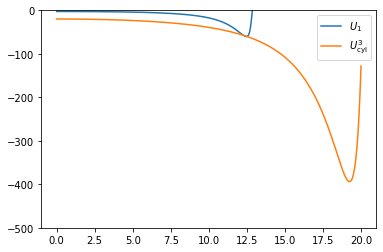

In [15]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_3,nε_3,R_3),label=r"$U_\mathrm{cyl}^3$")
ax.legend()
ax.set_ylim(-500,0)

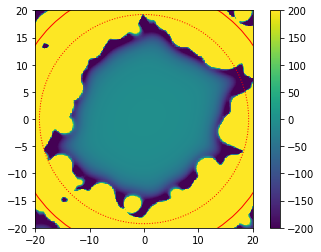

In [16]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_3,facecolor='None',edgecolor='r')
circ2 = Circle((0,0),r_min_3,facecolor='None',edgecolor='r',linestyle = ":")
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

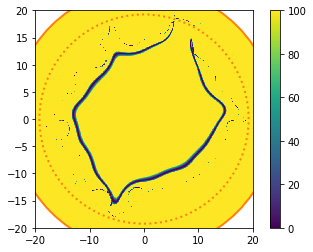

In [17]:
V_3 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_3,nε_3,R_3).T
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_3 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_3,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_3,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)


The $U_\mathrm{cyl}$ potential makes no sense. This is because we cutoff the potetiatl at $U = 0.0$ this creates data rich regions in the deep pockest near the corners of the quasi-hexagonal pore. Changing the potential to larger cutoffs breaks the fitting algorithm due to numerical instabilities. Lets cutoff the potential radial at the closest wall and see how fitting to all the data does.

(0, 15)

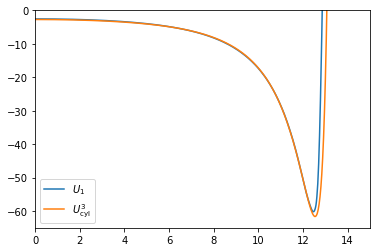

In [18]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_close_3,nε_close_3,R_close_3),label=r"$U_\mathrm{cyl}^3$")
ax.legend()
ax.set_ylim(-65,0)
ax.set_xlim(0,15)

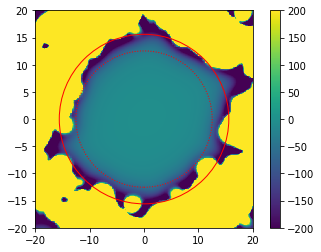

In [19]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_close_3,facecolor='None',edgecolor='r')
circ2 = Circle((0,0),r_min_close_3,facecolor='None',edgecolor='r',linestyle = ":")
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

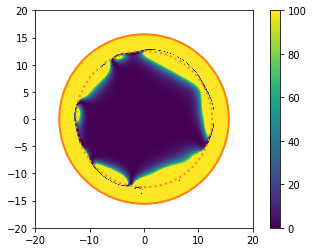

In [20]:
V_close_3 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_close_3,nε_close_3,R_close_3).T
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_close_3 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_close_3,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_close_3,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)


Here only fitting to the potential within the radial cutoff where we cut at the first potential greater that zero gives a more sensible fit, close to the radial average ($U_1$).

# 4 Pizza slicing the potential

This method has room for extreme variablility. It will depend on the width of the pizza slice. The width is probably something that can be optimized, where the limiting cases are fitting to the view (method 2) and fitting to the full potential (method 3). Starting with $10^\circ$ pizza slices.

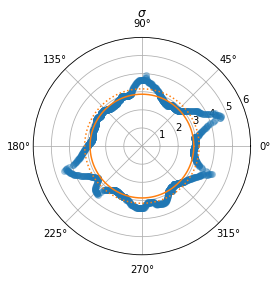

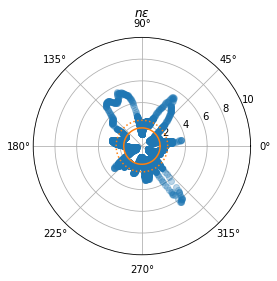

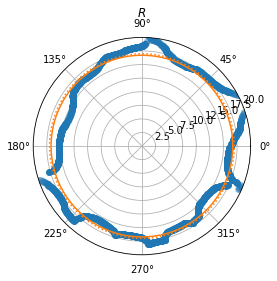

In [21]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 5.0*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_ten_4[σ_not_outlier_ten_4]+ϕ_shift,σ_ten_4[σ_not_outlier_ten_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_ten_4[σ_outlier_ten_4]+ϕ_shift,σ_ten_4[σ_outlier_ten_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_ten_4,np.ones_like(phis_ten_4)*σ_mean_ten_4,color="C1")
ax.plot(phis_ten_4,np.ones_like(phis_ten_4)*σ_mean_full_ten_4,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_ten_4[nε_not_outlier_ten_4]+ϕ_shift,nε_ten_4[nε_not_outlier_ten_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_ten_4[nε_outlier_ten_4]+ϕ_shift,nε_ten_4[nε_outlier_ten_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_ten_4,np.ones_like(phis_ten_4)*nε_mean_ten_4,color="C1")
ax.plot(phis_ten_4,np.ones_like(phis_ten_4)*nε_mean_full_ten_4,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_ten_4[R_not_outlier_ten_4]+ϕ_shift,R_ten_4[R_not_outlier_ten_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_ten_4[R_outlier_ten_4]+ϕ_shift,R_ten_4[R_outlier_ten_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_ten_4,np.ones_like(phis_ten_4)*R_mean_ten_4,color="C1")
ax.plot(phis_ten_4,np.ones_like(phis_ten_4)*R_mean_full_ten_4,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

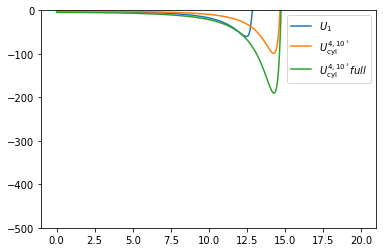

In [22]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_ten_4,nε_mean_ten_4,R_mean_ten_4),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_ten_4,nε_mean_full_ten_4,R_mean_full_ten_4),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

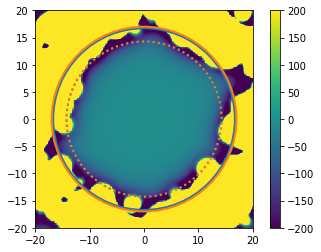

In [23]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_ten_4,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_ten_4,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_ten_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_ten_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

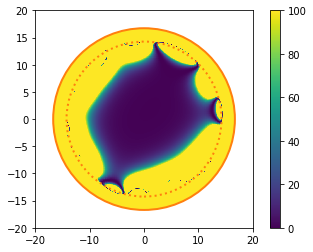

In [26]:
V_mean_ten_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_ten_4,nε_mean_ten_4,R_mean_ten_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_ten_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_ten_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_ten_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

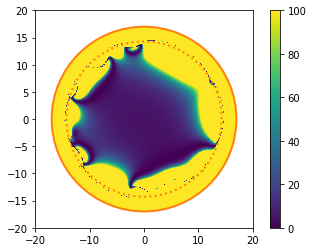

In [25]:
V_mean_full_ten_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_ten_4,nε_mean_full_ten_4,R_mean_full_ten_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_ten_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_ten_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_ten_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now for $5^\circ$ slices.

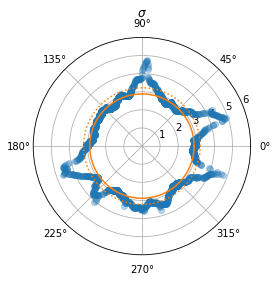

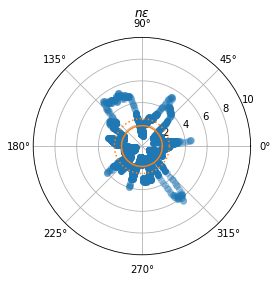

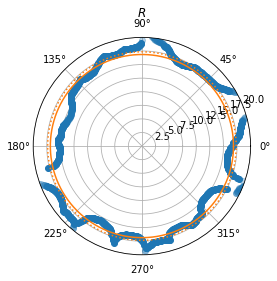

In [27]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 2.5*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_five_4[σ_not_outlier_five_4]+ϕ_shift,σ_five_4[σ_not_outlier_five_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_five_4[σ_outlier_five_4]+ϕ_shift,σ_five_4[σ_outlier_five_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_five_4,np.ones_like(phis_five_4)*σ_mean_five_4,color="C1")
ax.plot(phis_five_4,np.ones_like(phis_five_4)*σ_mean_full_five_4,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_five_4[nε_not_outlier_five_4]+ϕ_shift,nε_five_4[nε_not_outlier_five_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_five_4[nε_outlier_five_4]+ϕ_shift,nε_five_4[nε_outlier_five_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_five_4,np.ones_like(phis_five_4)*nε_mean_five_4,color="C1")
ax.plot(phis_five_4,np.ones_like(phis_five_4)*nε_mean_full_five_4,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_five_4[R_not_outlier_five_4]+ϕ_shift,R_five_4[R_not_outlier_five_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_five_4[R_outlier_five_4]+ϕ_shift,R_five_4[R_outlier_five_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_five_4,np.ones_like(phis_five_4)*R_mean_five_4,color="C1")
ax.plot(phis_five_4,np.ones_like(phis_five_4)*R_mean_full_five_4,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

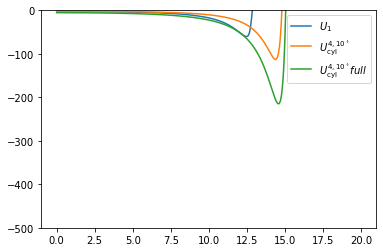

In [28]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_five_4,nε_mean_five_4,R_mean_five_4),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_five_4,nε_mean_full_five_4,R_mean_full_five_4),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

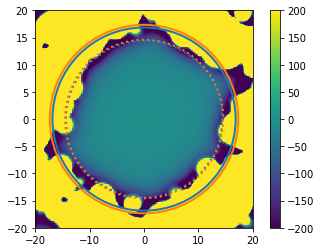

In [29]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_five_4,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_five_4,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_five_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_five_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

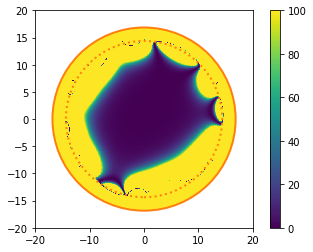

In [32]:
V_mean_five_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_five_4,nε_mean_five_4,R_mean_five_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_five_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_five_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_five_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

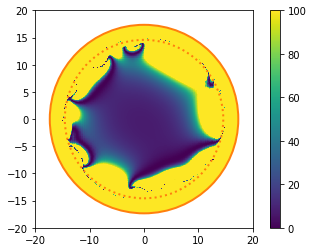

In [33]:
V_mean_full_five_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_five_4,nε_mean_full_five_4,R_mean_full_five_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_five_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_five_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_five_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $1^\circ$

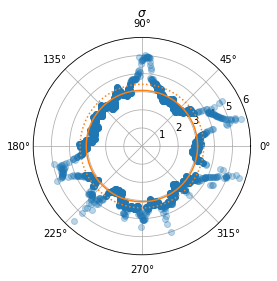

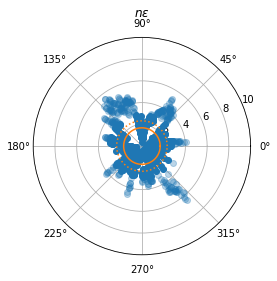

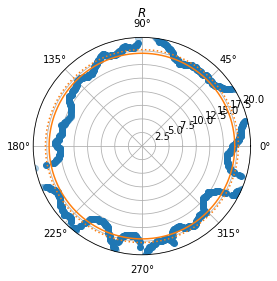

In [34]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 0.5*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_one_4[σ_not_outlier_one_4]+ϕ_shift,σ_one_4[σ_not_outlier_one_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_one_4[σ_outlier_one_4]+ϕ_shift,σ_one_4[σ_outlier_one_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_one_4,np.ones_like(phis_one_4)*σ_mean_one_4,color="C1")
ax.plot(phis_one_4,np.ones_like(phis_one_4)*σ_mean_full_one_4,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_one_4[nε_not_outlier_one_4]+ϕ_shift,nε_one_4[nε_not_outlier_one_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_one_4[nε_outlier_one_4]+ϕ_shift,nε_one_4[nε_outlier_one_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_one_4,np.ones_like(phis_one_4)*nε_mean_one_4,color="C1")
ax.plot(phis_one_4,np.ones_like(phis_one_4)*nε_mean_full_one_4,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_one_4[R_not_outlier_one_4]+ϕ_shift,R_one_4[R_not_outlier_one_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_one_4[R_outlier_one_4]+ϕ_shift,R_one_4[R_outlier_one_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_one_4,np.ones_like(phis_one_4)*R_mean_one_4,color="C1")
ax.plot(phis_one_4,np.ones_like(phis_one_4)*R_mean_full_one_4,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

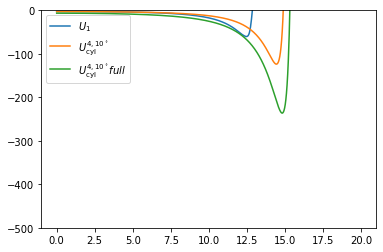

In [35]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_one_4,nε_mean_one_4,R_mean_one_4),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_one_4,nε_mean_full_one_4,R_mean_full_one_4),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

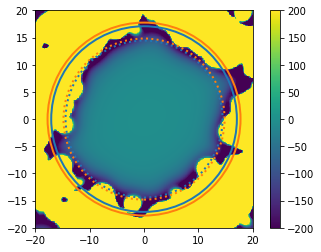

In [36]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_one_4,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_one_4,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_one_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_one_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

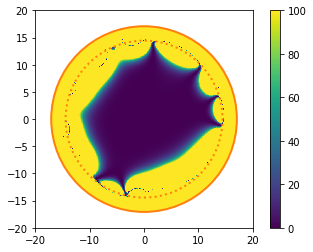

In [37]:
V_mean_one_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_one_4,nε_mean_one_4,R_mean_one_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_one_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_one_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_one_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

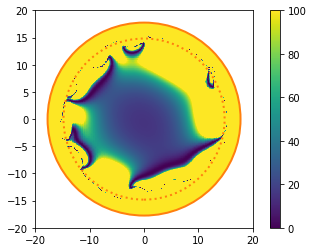

In [38]:
V_mean_full_one_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_one_4,nε_mean_full_one_4,R_mean_full_one_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_one_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_one_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_one_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $30^\circ$

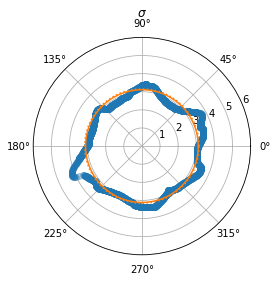

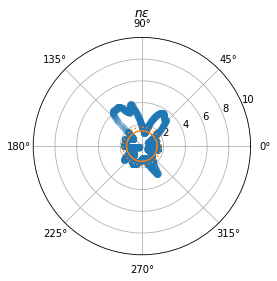

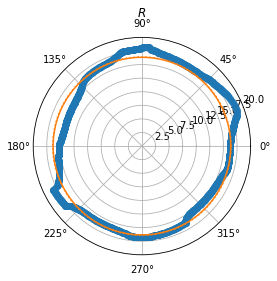

In [39]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 15.0*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_thirty_4[σ_not_outlier_thirty_4]+ϕ_shift,σ_thirty_4[σ_not_outlier_thirty_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_thirty_4[σ_outlier_thirty_4]+ϕ_shift,σ_thirty_4[σ_outlier_thirty_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_thirty_4,np.ones_like(phis_thirty_4)*σ_mean_thirty_4,color="C1")
ax.plot(phis_thirty_4,np.ones_like(phis_thirty_4)*σ_mean_full_thirty_4,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_thirty_4[nε_not_outlier_thirty_4]+ϕ_shift,nε_thirty_4[nε_not_outlier_thirty_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_thirty_4[nε_outlier_thirty_4]+ϕ_shift,nε_thirty_4[nε_outlier_thirty_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_thirty_4,np.ones_like(phis_thirty_4)*nε_mean_thirty_4,color="C1")
ax.plot(phis_thirty_4,np.ones_like(phis_thirty_4)*nε_mean_full_thirty_4,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_thirty_4[R_not_outlier_thirty_4]+ϕ_shift,R_thirty_4[R_not_outlier_thirty_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_thirty_4[R_outlier_thirty_4]+ϕ_shift,R_thirty_4[R_outlier_thirty_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_thirty_4,np.ones_like(phis_thirty_4)*R_mean_thirty_4,color="C1")
ax.plot(phis_thirty_4,np.ones_like(phis_thirty_4)*R_mean_full_thirty_4,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

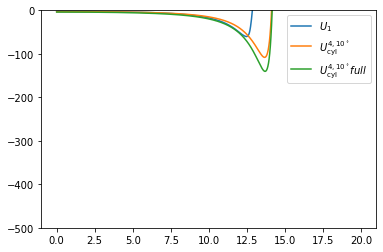

In [40]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_thirty_4,nε_mean_thirty_4,R_mean_thirty_4),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_thirty_4,nε_mean_full_thirty_4,R_mean_full_thirty_4),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

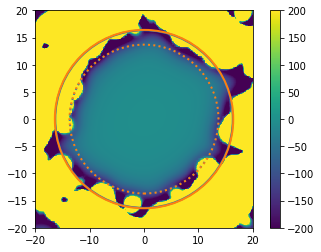

In [41]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_thirty_4,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_thirty_4,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_thirty_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_thirty_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

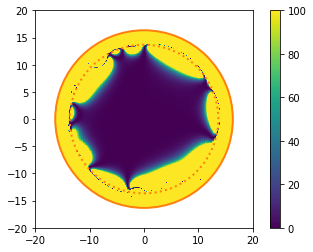

In [42]:
V_mean_thirty_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_thirty_4,nε_mean_thirty_4,R_mean_thirty_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_thirty_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_thirty_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_thirty_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

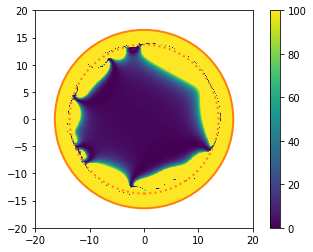

In [43]:
V_mean_full_thirty_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_thirty_4,nε_mean_full_thirty_4,R_mean_full_thirty_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_thirty_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_thirty_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_thirty_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $60^\circ$

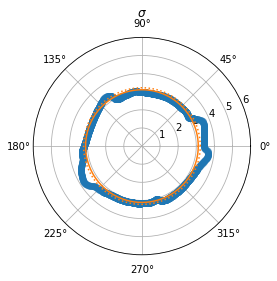

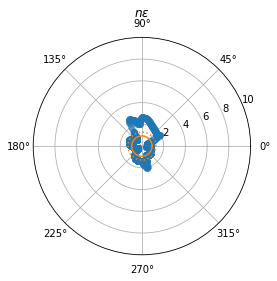

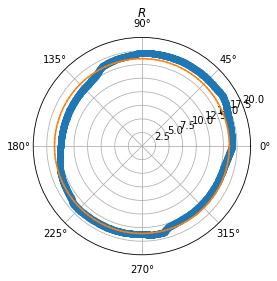

In [44]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 30.0*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_sixty_4[σ_not_outlier_sixty_4]+ϕ_shift,σ_sixty_4[σ_not_outlier_sixty_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_sixty_4[σ_outlier_sixty_4]+ϕ_shift,σ_sixty_4[σ_outlier_sixty_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_sixty_4,np.ones_like(phis_sixty_4)*σ_mean_sixty_4,color="C1")
ax.plot(phis_sixty_4,np.ones_like(phis_sixty_4)*σ_mean_full_sixty_4,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_sixty_4[nε_not_outlier_sixty_4]+ϕ_shift,nε_sixty_4[nε_not_outlier_sixty_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_sixty_4[nε_outlier_sixty_4]+ϕ_shift,nε_sixty_4[nε_outlier_sixty_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_sixty_4,np.ones_like(phis_sixty_4)*nε_mean_sixty_4,color="C1")
ax.plot(phis_sixty_4,np.ones_like(phis_sixty_4)*nε_mean_full_sixty_4,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_sixty_4[R_not_outlier_sixty_4]+ϕ_shift,R_sixty_4[R_not_outlier_sixty_4],linestyle="None",marker="o",color="C0")
ax.plot(phis_sixty_4[R_outlier_sixty_4]+ϕ_shift,R_sixty_4[R_outlier_sixty_4],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_sixty_4,np.ones_like(phis_sixty_4)*R_mean_sixty_4,color="C1")
ax.plot(phis_sixty_4,np.ones_like(phis_sixty_4)*R_mean_full_sixty_4,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

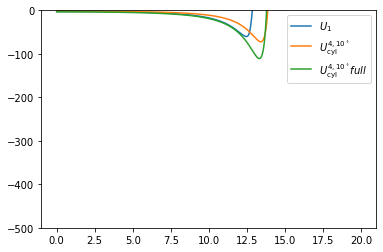

In [45]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_sixty_4,nε_mean_sixty_4,R_mean_sixty_4),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_sixty_4,nε_mean_full_sixty_4,R_mean_full_sixty_4),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

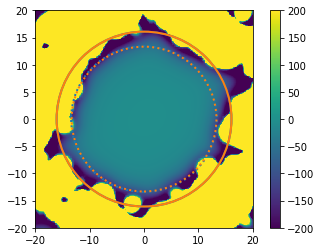

In [46]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_sixty_4,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_sixty_4,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_sixty_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_sixty_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

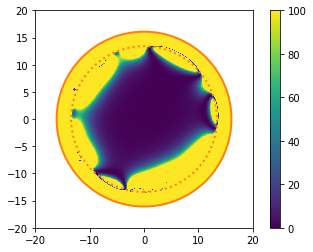

In [47]:
V_mean_sixty_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_sixty_4,nε_mean_sixty_4,R_mean_sixty_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_sixty_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_sixty_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_sixty_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

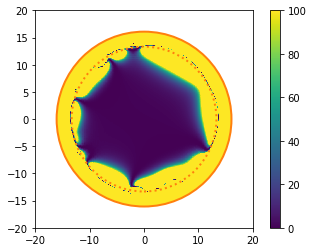

In [48]:
V_mean_full_sixty_4 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_sixty_4,nε_mean_full_sixty_4,R_mean_full_sixty_4)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_sixty_4 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_sixty_4,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_sixty_4,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

# 5 Integrate the pizza wedges and then fit
This method integrates over a pizza slice and then fits to $U_\mathrm{cyl}$

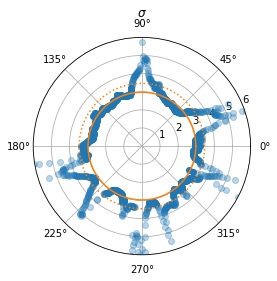

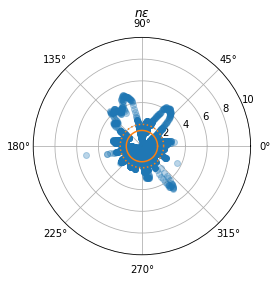

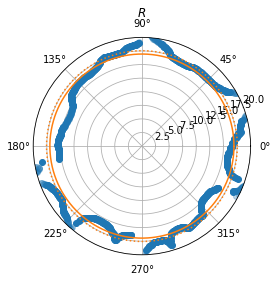

In [50]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 5.0*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_int_ten_5[σ_not_outlier_int_ten_5]+ϕ_shift,σ_int_ten_5[σ_not_outlier_int_ten_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_ten_5[σ_outlier_int_ten_5]+ϕ_shift,σ_int_ten_5[σ_outlier_int_ten_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_int_ten_5,np.ones_like(phis_int_ten_5)*σ_mean_int_ten_5,color="C1")
ax.plot(phis_int_ten_5,np.ones_like(phis_int_ten_5)*σ_mean_full_int_ten_5,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_ten_5[nε_not_outlier_int_ten_5]+ϕ_shift,nε_int_ten_5[nε_not_outlier_int_ten_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_ten_5[nε_outlier_int_ten_5]+ϕ_shift,nε_int_ten_5[nε_outlier_int_ten_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_int_ten_5,np.ones_like(phis_int_ten_5)*nε_mean_int_ten_5,color="C1")
ax.plot(phis_int_ten_5,np.ones_like(phis_int_ten_5)*nε_mean_full_int_ten_5,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_ten_5[R_not_outlier_int_ten_5]+ϕ_shift,R_int_ten_5[R_not_outlier_int_ten_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_ten_5[R_outlier_int_ten_5]+ϕ_shift,R_int_ten_5[R_outlier_int_ten_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_int_ten_5,np.ones_like(phis_int_ten_5)*R_mean_int_ten_5,color="C1")
ax.plot(phis_int_ten_5,np.ones_like(phis_int_ten_5)*R_mean_full_int_ten_5,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

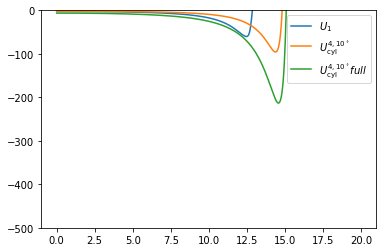

In [51]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_int_ten_5,nε_mean_int_ten_5,R_mean_int_ten_5),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_int_ten_5,nε_mean_full_int_ten_5,R_mean_full_int_ten_5),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

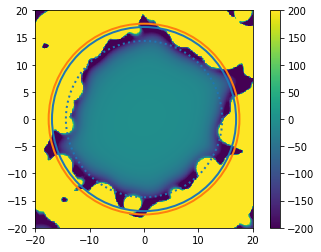

In [52]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_ten_5,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_int_ten_5,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_int_ten_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_int_ten_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

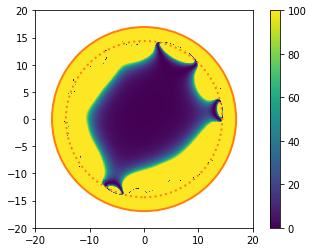

In [53]:
V_mean_int_ten_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_int_ten_5,nε_mean_int_ten_5,R_mean_int_ten_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_int_ten_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_ten_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_int_ten_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

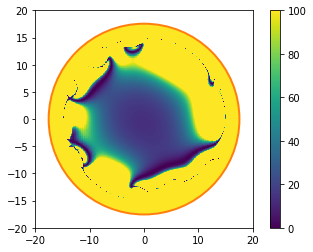

In [54]:
V_mean_full_int_ten_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_int_ten_5,nε_mean_full_int_ten_5,R_mean_full_int_ten_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_int_ten_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_int_ten_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_int_ten_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $5^\circ$

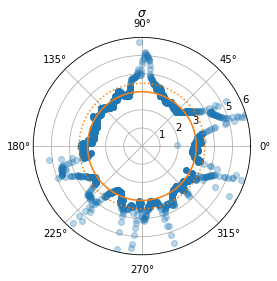

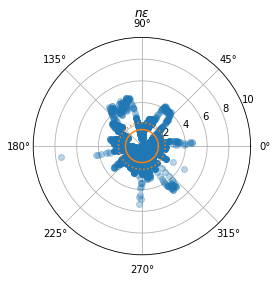

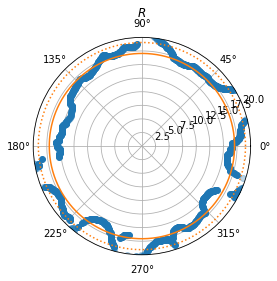

In [55]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 2.5*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_int_five_5[σ_not_outlier_int_five_5]+ϕ_shift,σ_int_five_5[σ_not_outlier_int_five_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_five_5[σ_outlier_int_five_5]+ϕ_shift,σ_int_five_5[σ_outlier_int_five_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_int_five_5,np.ones_like(phis_int_five_5)*σ_mean_int_five_5,color="C1")
ax.plot(phis_int_five_5,np.ones_like(phis_int_five_5)*σ_mean_full_int_five_5,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_five_5[nε_not_outlier_int_five_5]+ϕ_shift,nε_int_five_5[nε_not_outlier_int_five_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_five_5[nε_outlier_int_five_5]+ϕ_shift,nε_int_five_5[nε_outlier_int_five_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_int_five_5,np.ones_like(phis_int_five_5)*nε_mean_int_five_5,color="C1")
ax.plot(phis_int_five_5,np.ones_like(phis_int_five_5)*nε_mean_full_int_five_5,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_five_5[R_not_outlier_int_five_5]+ϕ_shift,R_int_five_5[R_not_outlier_int_five_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_five_5[R_outlier_int_five_5]+ϕ_shift,R_int_five_5[R_outlier_int_five_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_int_five_5,np.ones_like(phis_int_five_5)*R_mean_int_five_5,color="C1")
ax.plot(phis_int_five_5,np.ones_like(phis_int_five_5)*R_mean_full_int_five_5,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

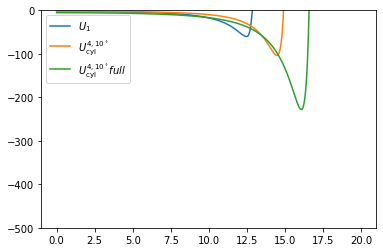

In [56]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_int_five_5,nε_mean_int_five_5,R_mean_int_five_5),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_int_five_5,nε_mean_full_int_five_5,R_mean_full_int_five_5),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

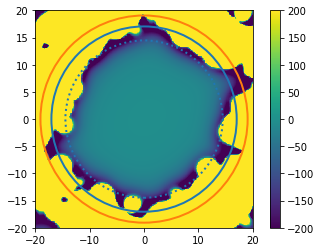

In [57]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_five_5,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_int_five_5,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_int_five_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_int_five_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

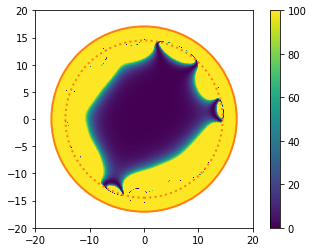

In [58]:
V_mean_int_five_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_int_five_5,nε_mean_int_five_5,R_mean_int_five_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_int_five_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_five_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_int_five_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

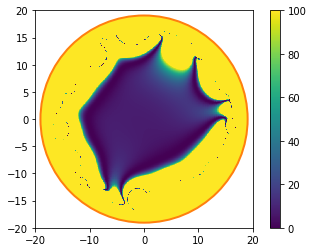

In [59]:
V_mean_full_int_five_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_int_five_5,nε_mean_full_int_five_5,R_mean_full_int_five_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_int_five_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_int_five_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_int_five_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $1^\circ$

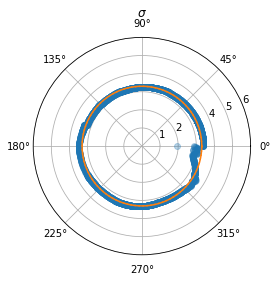

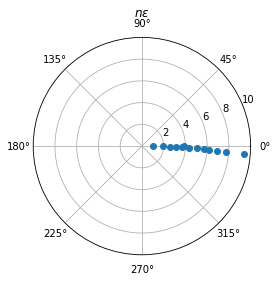

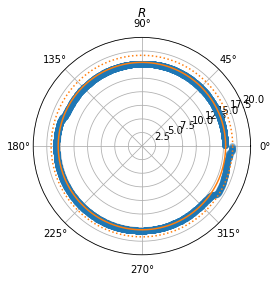

In [60]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 0.5*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_int_one_5[σ_not_outlier_int_one_5]+ϕ_shift,σ_int_one_5[σ_not_outlier_int_one_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_one_5[σ_outlier_int_one_5]+ϕ_shift,σ_int_one_5[σ_outlier_int_one_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_int_one_5,np.ones_like(phis_int_one_5)*σ_mean_int_one_5,color="C1")
ax.plot(phis_int_one_5,np.ones_like(phis_int_one_5)*σ_mean_full_int_one_5,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_one_5[nε_not_outlier_int_one_5]+ϕ_shift,nε_int_one_5[nε_not_outlier_int_one_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_one_5[nε_outlier_int_one_5]+ϕ_shift,nε_int_one_5[nε_outlier_int_one_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_int_one_5,np.ones_like(phis_int_one_5)*nε_mean_int_one_5,color="C1")
ax.plot(phis_int_one_5,np.ones_like(phis_int_one_5)*nε_mean_full_int_one_5,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_one_5[R_not_outlier_int_one_5]+ϕ_shift,R_int_one_5[R_not_outlier_int_one_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_one_5[R_outlier_int_one_5]+ϕ_shift,R_int_one_5[R_outlier_int_one_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_int_one_5,np.ones_like(phis_int_one_5)*R_mean_int_one_5,color="C1")
ax.plot(phis_int_one_5,np.ones_like(phis_int_one_5)*R_mean_full_int_one_5,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

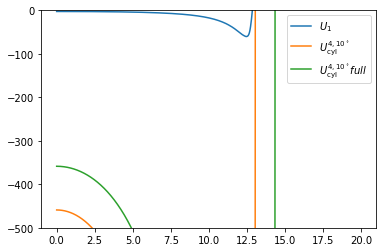

In [61]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_int_one_5,nε_mean_int_one_5,R_mean_int_one_5),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_int_one_5,nε_mean_full_int_one_5,R_mean_full_int_one_5),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

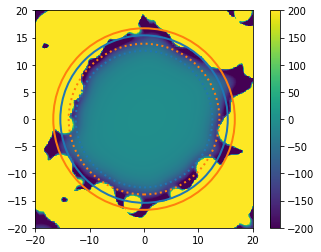

In [62]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_one_5,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_int_one_5,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_int_one_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_int_one_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

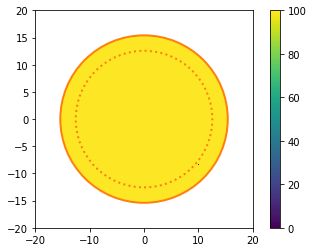

In [63]:
V_mean_int_one_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_int_one_5,nε_mean_int_one_5,R_mean_int_one_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_int_one_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_one_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_int_one_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

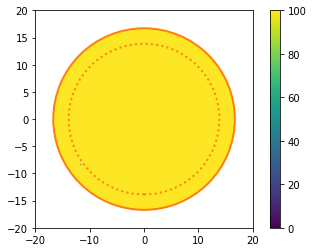

In [64]:
V_mean_full_int_one_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_int_one_5,nε_mean_full_int_one_5,R_mean_full_int_one_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_int_one_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_int_one_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_int_one_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $30^\circ$

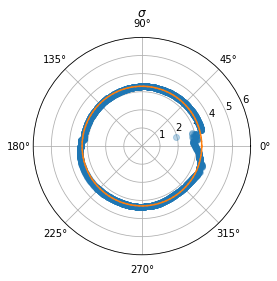

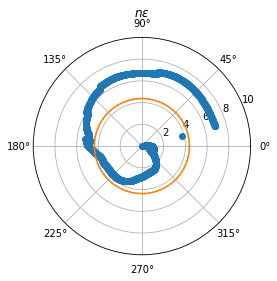

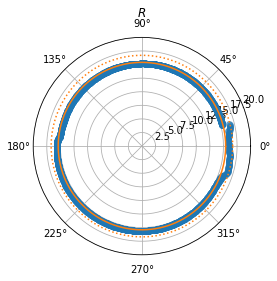

In [65]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 15.0*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_int_thirty_5[σ_not_outlier_int_thirty_5]+ϕ_shift,σ_int_thirty_5[σ_not_outlier_int_thirty_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_thirty_5[σ_outlier_int_thirty_5]+ϕ_shift,σ_int_thirty_5[σ_outlier_int_thirty_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_int_thirty_5,np.ones_like(phis_int_thirty_5)*σ_mean_int_thirty_5,color="C1")
ax.plot(phis_int_thirty_5,np.ones_like(phis_int_thirty_5)*σ_mean_full_int_thirty_5,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_thirty_5[nε_not_outlier_int_thirty_5]+ϕ_shift,nε_int_thirty_5[nε_not_outlier_int_thirty_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_thirty_5[nε_outlier_int_thirty_5]+ϕ_shift,nε_int_thirty_5[nε_outlier_int_thirty_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_int_thirty_5,np.ones_like(phis_int_thirty_5)*nε_mean_int_thirty_5,color="C1")
ax.plot(phis_int_thirty_5,np.ones_like(phis_int_thirty_5)*nε_mean_full_int_thirty_5,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_thirty_5[R_not_outlier_int_thirty_5]+ϕ_shift,R_int_thirty_5[R_not_outlier_int_thirty_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_thirty_5[R_outlier_int_thirty_5]+ϕ_shift,R_int_thirty_5[R_outlier_int_thirty_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_int_thirty_5,np.ones_like(phis_int_thirty_5)*R_mean_int_thirty_5,color="C1")
ax.plot(phis_int_thirty_5,np.ones_like(phis_int_thirty_5)*R_mean_full_int_thirty_5,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

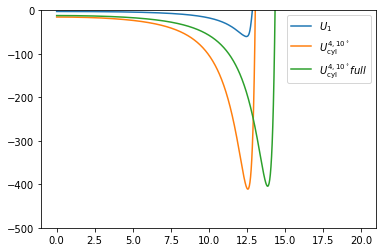

In [66]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_int_thirty_5,nε_mean_int_thirty_5,R_mean_int_thirty_5),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_int_thirty_5,nε_mean_full_int_thirty_5,R_mean_full_int_thirty_5),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

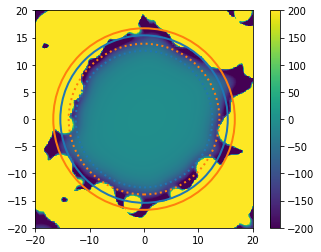

In [67]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_thirty_5,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_int_thirty_5,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_int_thirty_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_int_thirty_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

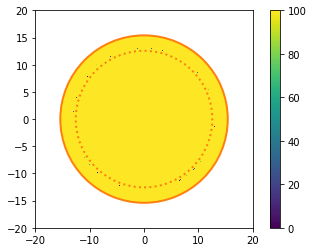

In [68]:
V_mean_int_thirty_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_int_thirty_5,nε_mean_int_thirty_5,R_mean_int_thirty_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_int_thirty_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_thirty_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_int_thirty_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

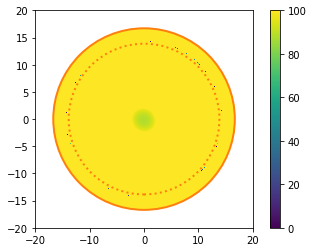

In [69]:
V_mean_full_int_thirty_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_int_thirty_5,nε_mean_full_int_thirty_5,R_mean_full_int_thirty_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_int_thirty_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_int_thirty_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_int_thirty_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

Now $60^\circ$

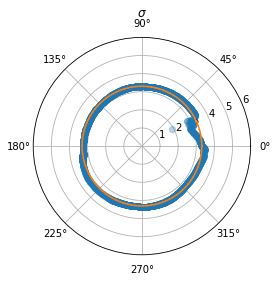

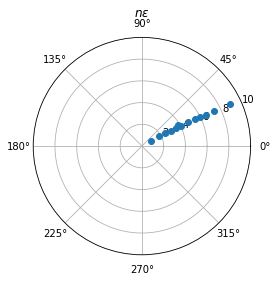

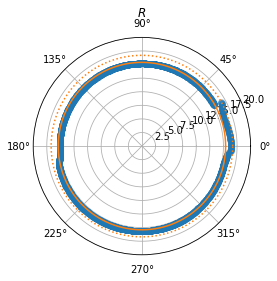

In [70]:
fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ϕ_shift = 30.0*np.pi/180.0 # Center on wedges (needs to be in radians)
ax.plot(phis_int_sixty_5[σ_not_outlier_int_sixty_5]+ϕ_shift,σ_int_sixty_5[σ_not_outlier_int_sixty_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_sixty_5[σ_outlier_int_sixty_5]+ϕ_shift,σ_int_sixty_5[σ_outlier_int_sixty_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,6)
ax.plot(phis_int_sixty_5,np.ones_like(phis_int_sixty_5)*σ_mean_int_sixty_5,color="C1")
ax.plot(phis_int_sixty_5,np.ones_like(phis_int_sixty_5)*σ_mean_full_int_sixty_5,color="C1",linestyle=":")
ax.set_title(r"$\sigma$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_sixty_5[nε_not_outlier_int_sixty_5]+ϕ_shift,nε_int_sixty_5[nε_not_outlier_int_sixty_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_sixty_5[nε_outlier_int_sixty_5]+ϕ_shift,nε_int_sixty_5[nε_outlier_int_sixty_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,10)
ax.plot(phis_int_sixty_5,np.ones_like(phis_int_sixty_5)*nε_mean_int_sixty_5,color="C1")
ax.plot(phis_int_sixty_5,np.ones_like(phis_int_sixty_5)*nε_mean_full_int_sixty_5,color="C1",linestyle=":")
ax.set_title(r"$n\epsilon$",pad=10)

fig,ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(phis_int_sixty_5[R_not_outlier_int_sixty_5]+ϕ_shift,R_int_sixty_5[R_not_outlier_int_sixty_5],linestyle="None",marker="o",color="C0")
ax.plot(phis_int_sixty_5[R_outlier_int_sixty_5]+ϕ_shift,R_int_sixty_5[R_outlier_int_sixty_5],linestyle="None",marker="o",color="C0",alpha=0.3)
ax.set_ylim(0,20)
ax.set_title(r"$R$",pad=10)
ax.plot(phis_int_sixty_5,np.ones_like(phis_int_sixty_5)*R_mean_int_sixty_5,color="C1")
ax.plot(phis_int_sixty_5,np.ones_like(phis_int_sixty_5)*R_mean_full_int_sixty_5,color="C1",linestyle=":")

The solid is the average of each parameter throwing out outliers, the dashed is the average over the full set of angles for that set of data.

(-500, 0)

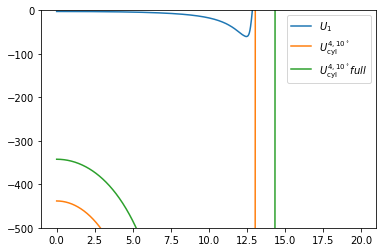

In [71]:
fig,ax = plt.subplots()
ax.plot(r_1,U_1,label=r"$U_1$")
ax.plot(r_1,U_min(r_1,σ_mean_int_sixty_5,nε_mean_int_sixty_5,R_mean_int_sixty_5),label=r"$U_\mathrm{cyl}^{4,10^\circ}$")
ax.plot(r_1,U_min(r_1,σ_mean_full_int_sixty_5,nε_mean_full_int_sixty_5,R_mean_full_int_sixty_5),label=r"$U_\mathrm{cyl}^{4,10^\circ} full$")
ax.legend()
ax.set_ylim(-500,0)

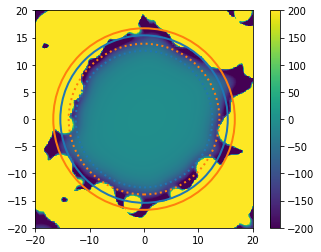

In [72]:
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow(cartesian_linear.T,origin='lower',extent=extent,vmax=200,vmin=-200)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_sixty_5,facecolor='None',edgecolor='C0',linewidth=2)
circ2 = Circle((0,0),r_min_int_sixty_5,facecolor='None',edgecolor='C0',linestyle = ":",linewidth=2)
circ_full = Circle((0,0),R_mean_full_int_sixty_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2_full = Circle((0,0),r_min_full_int_sixty_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ_full)
ax.add_patch(circ2_full)
cbar = fig.colorbar(im)

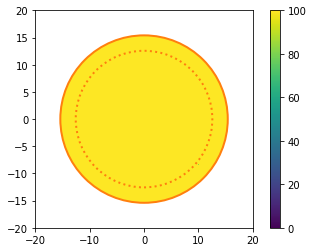

In [73]:
V_mean_int_sixty_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_int_sixty_5,nε_mean_int_sixty_5,R_mean_int_sixty_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_int_sixty_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_int_sixty_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_int_sixty_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)

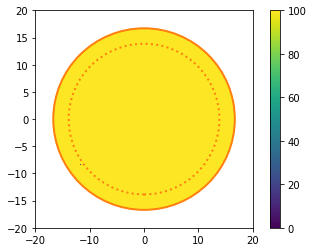

In [74]:
V_mean_full_int_sixty_5 = U_min(np.sqrt(cartesian_x**2 + cartesian_y**2),σ_mean_full_int_sixty_5,nε_mean_full_int_sixty_5,R_mean_full_int_sixty_5)
extent = cartesian_extent
fig,ax=plt.subplots()
im = ax.imshow((V_mean_full_int_sixty_5 - cartesian_linear)**2 ,origin='lower',extent=extent,vmax=100,vmin=0)#,cmap="Spectral_r")
circ = Circle((0,0),R_mean_full_int_sixty_5,facecolor='None',edgecolor='C1',linewidth=2)
circ2 = Circle((0,0),r_min_full_int_sixty_5,facecolor='None',edgecolor='C1',linestyle = ":",linewidth=2)
ax.add_patch(circ)
ax.add_patch(circ2)
cbar = fig.colorbar(im)